# Ecommerce Project

We have a fictional Ecommerce company based in New York City that sells clothing online but they also have 
in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with 
a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
Let's get started!

In [1]:
#importing the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

________
## Data Information

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [2]:
#storing the provided dataset into variable 'df_customers'

df_customers = pd.read_csv('Ecommerce Customers')
df_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
df_customers.info()         #Here we can see the dataset contains 500 non-empty entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


________

## Exploratory Data Analysis

**Let's explore the data!**



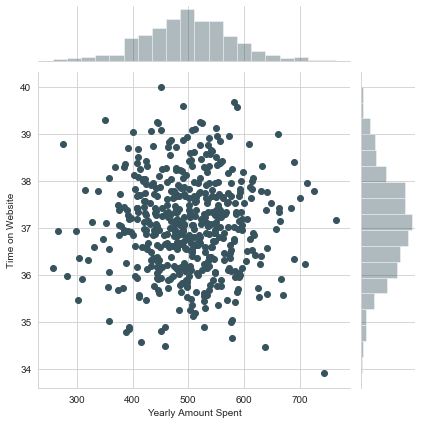

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Yearly Amount Spent', y='Time on Website', data=df_customers)

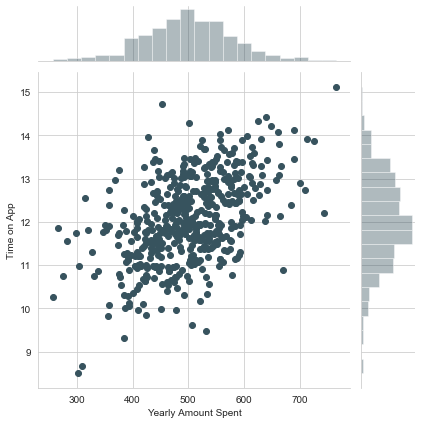

In [7]:
sns.jointplot(x='Yearly Amount Spent', y='Time on App', data=df_customers)

**Let's explore these types of relationships across the entire data set.**

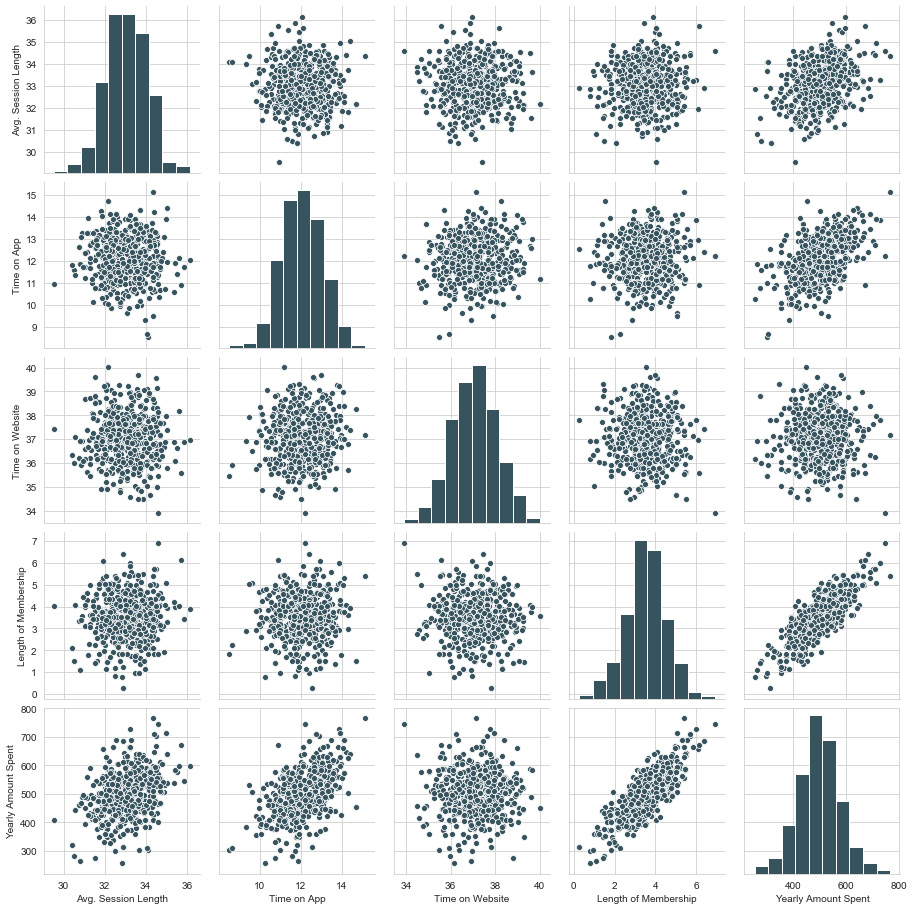

In [9]:
sns.pairplot(df_customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [8]:
#The most correlated feature with the 'Yearly Amount Spent' is 'Length of Membership'

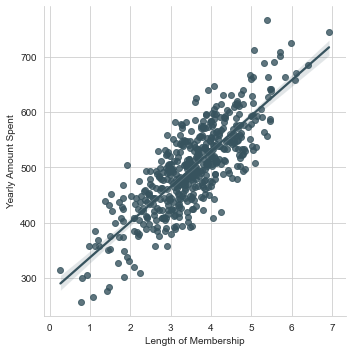

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df_customers)

______
## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [32]:
X = df_customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] #This is our feature set
y = df_customers['Yearly Amount Spent'] #This is our target set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**We will be using Linear Regression model from the liner_model family**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing out the coefficients of the model**

In [23]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [24]:
predict = lm.predict(X_test)

**We are using scatterplot to test our model of the real test values versus the predicted values.**

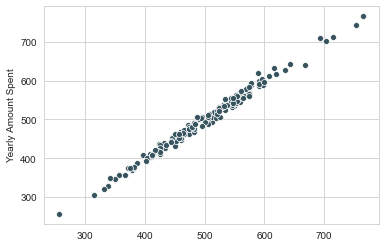

In [34]:
sns.scatterplot(predict,y_test) #We can observe the Real and Predicted values almost overlap each other which shows a good fit.

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [26]:
from sklearn import metrics

In [27]:
print(metrics.mean_absolute_error(predict,y_test))
print(metrics.mean_squared_error(predict,y_test))
print(np.sqrt(metrics.mean_squared_error(predict,y_test)))

7.228148653430853
79.81305165097487
8.933815066978656


## Residuals

We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Ploting a histogram of the residuals and make sure it looks normally distributed. Normally distributed histogram gives us the idea that its a good fit**

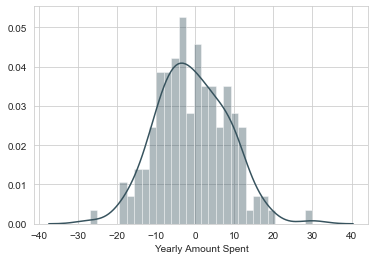

In [28]:
sns.distplot((y_test-predict), bins=30)

## Conclusion/Findings
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Let's create a DataFrame of coeffiients of our features used in the model**

In [35]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can you interpret these coefficients?**

*The coefficents can be interpreted as holding all other features fixed, and increasing the 1 unit(in mins.) in Avg. Session Length is associated with increase in 25.98 dollars spent.
And same for other features as well, with increasing 1 unit in 'Time on App', 'Time on Website', and 'Length of Membership' can be associated with increase in 38.59, 0.19, and 61.27 dollars respectively.*

**Should the company focus more on their mobile app or on their website?**

*The coefficients shows us that App is doing better job than the Website. There could be various factors due to which we get such findings for example. users might be poor website design, app usage being easier, users preferring app cause of easibilty, etc. The company can invest in developing the website better to catch up with the performance of the app or invest in already performing app to do better.
Also increasing Length of Membership proves to be a lot better selling point than Website and App combined. So in other context company should also be focused on selling off more memberships.*

## Thank You!

